## 4.サポートベクターマシン

In [ ]:
import numpy as np
import pandas as pd

データを読み込みます。（ここでは、SVM.csvを読み込んでいます。）

データ内容は以下の通り

ID：ID
months：使用月数  
falls：直近1か月で落下させた回数  
sex：利用者の性別（1=男性／2=女性）  
age：利用者の年代  
past_falls：過去の故障歴の有無  
crack：ヒビの有無  
width：機種サイズ  
height：機種サイズ  
thick：機種サイズ  
cover：ケースにカバーがついているか  
ring：ケースにリングがついているか  

In [ ]:
df = pd.read_csv("SVM.csv",index_col=0)
df

,months,falls,sex,age,past_falls,crack,width,height,thick,cover,ring
ID,,,,,,,,,,,
1,38,0,1,10,0,0,60,140,7,1,0
2,23,0,2,10,0,0,60,140,7,1,1
3,3,2,1,10,1,1,64,131,7,0,0
4,30,0,1,10,0,1,71,146,7,0,1
5,15,0,1,10,0,0,78,160,7,0,0
6,36,1,2,10,0,0,64,131,7,1,0
7,5,1,2,10,0,1,71,146,7,0,0
8,5,0,2,10,0,1,78,160,7,1,0
9,36,1,1,10,0,0,67,138,7,1,0


スマホが壊れたかどうかを目的変数とし、故障に関係のありそうな変数を選んでモデルを作成してみます。

In [ ]:
X = df.drop(['past_falls','sex','age','ring'], axis=1).values

# 目的変数
Y = df['past_falls'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#学習データとテストデータに分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# データの標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

PCAを使用して、次元を削除します。  
多次元データを2次元データに減らしています。

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_std2 = pca.fit_transform(X_train_std)
X_test_std2 = pca.fit_transform(X_test_std)

In [ ]:
X_train_std.shape

(27, 7)

In [ ]:
X_train_std2.shape

(27, 2)

### モデルの構築

In [ ]:
from sklearn.svm import SVC

#モデルの構築（線形SVM，RBFカーネル）
model1 = SVC(kernel='linear')
model2 = SVC(kernel='rbf')

model1.fit(X_train_std2, Y_train)
model2.fit(X_train_std2, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### 分類結果の図示

実際に、学習データのモデルを用いて分類結果を図示します

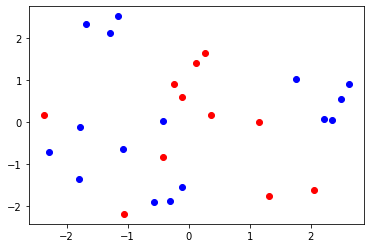

In [ ]:
from matplotlib import pyplot

pyplot.plot(X_train_std2[Y_train == 1,0], X_train_std2[Y_train == 1,1], 'ro')
pyplot.plot(X_train_std2[Y_train == 0,0], X_train_std2[Y_train == 0,1], 'bo')
pyplot.show()

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


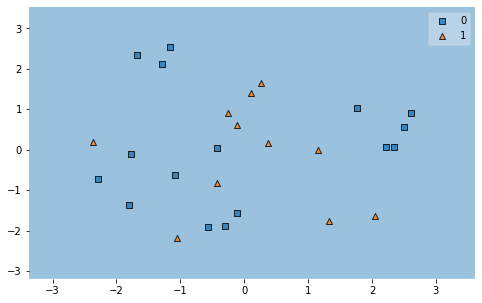

In [ ]:
#分類結果を図示する
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(8,5))
plot_decision_regions(X_train_std2, Y_train, clf=model1)
plt.show()

線形では上手く分離できていないことが分かりました。

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


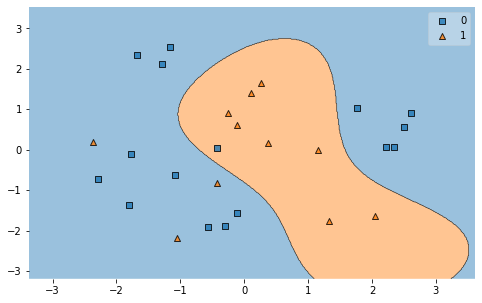

In [ ]:
#分類結果を図示する
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(8,5))
plot_decision_regions(X_train_std2, Y_train, clf=model2)
plt.show()

RBFカーネルでは、上手く分けられているように見えます。

### モデルの精度を確認

学習データに対する精度を求めます

過学習していないかどうかを確かめるために、テストデータを用いて精度を計算します

In [ ]:
from sklearn.metrics import accuracy_score

# 学習データに対する精度
pred_train = model2.predict(X_train_std2)
accuracy_train = accuracy_score(Y_train, pred_train)
print('学習データに対する正解率： %.2f' % accuracy_train)

学習データに対する正解率： 0.85


In [ ]:
# テストデータに対する精度
pred_test = model2.predict(X_test_std2)
accuracy_test = accuracy_score(Y_test, pred_test)
print('テストデータに対する正解率： %.2f' % accuracy_test)

テストデータに対する正解率： 0.75


RBFカーネルのモデルは、学習データでも上手く分離できていて、過学習も防げています。 

テストデータの分類結果の図示は以下の通りです

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


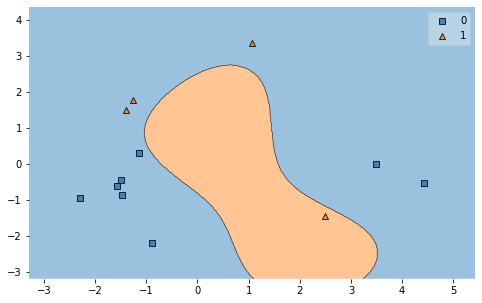

In [ ]:
#分類結果を図示する
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(8,5))
plot_decision_regions(X_test_std2, Y_test, clf=model2)
plt.show()

混合行列でも精度を確認してみます。

In [ ]:
# model_no --> 4
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
#混合行列で精度を確認する
mat = confusion_matrix(Y_test,pred_test)

#pandasで表の形に
class_names = ["0", "1"]
data = pd.DataFrame(mat,index=class_names,columns=class_names)
print("RBFカーネルSVM")
data
print(data)
print("F1score")
print(f1_score(Y_test, pred_test, average="macro"))

RBFカーネルSVM
   0  1
0  8  0
1  3  1
F1score
0.6210526315789474
